<a href="https://colab.research.google.com/github/mperricone24/Final-Project-/blob/main/Python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd

In [53]:
import plotly.express as px

In [123]:
Gold_CSV = "https://raw.githubusercontent.com/mperricone24/Final-Project-/refs/heads/main/Gold%20Prices%20monthly%20filtered%20V3.csv"
SP500_CSV = "https://raw.githubusercontent.com/mperricone24/Final-Project-/refs/heads/main/SP500%20(1).csv"
Crude_Oil_CSV = "https://raw.githubusercontent.com/mperricone24/Final-Project-/refs/heads/main/DCOILBRENTEU.csv"

In [93]:
df_Gold = pd.read_csv(Gold_CSV)
df.head()
rows, cols = df.shape
rows, cols

(5949, 2)

In [94]:
df_Gold

,Date,Price
0,NaN,NaN
1,2015-01,1250.75
2,2015-02,1227.08
3,2015-03,1178.63
4,2015-04,1198.93
...,...,...
123,2025-03,2983.25
124,2025-04,3217.64
125,2025-05,3309.49
126,2025-06,3352.66


In [126]:
df_Crude_Oil = pd.read_csv(Crude_Oil_CSV)
df.head()
rows, cols = df.shape
rows, cols

(5949, 2)

In [127]:
df_Crude_Oil

,observation_date,DCOILBRENTEU
0,2015-01-02,55.38
1,2015-01-05,51.08
2,2015-01-06,50.12
3,2015-01-07,49.06
4,2015-01-08,49.43
...,...,...
2812,2025-10-14,63.00
2813,2025-10-15,62.33
2814,2025-10-16,61.08
2815,2025-10-17,61.23


In [41]:
df_SP500 = pd.read_csv(SP500_CSV)
df.head()
rows, cols = df.shape
rows, cols

(5949, 2)

In [45]:
df_SP500

,observation_date,SP500
0,2015-10-23,2075.15
1,2015-10-26,2071.18
2,2015-10-27,2065.89
3,2015-10-28,2090.35
4,2015-10-29,2089.41
...,...,...
2604,2025-10-16,6629.07
2605,2025-10-17,6664.01
2606,2025-10-20,6735.13
2607,2025-10-21,6735.35


In [89]:
category_col_Gold = 'Date'
numeric_col_Gold = 'Price'

In [48]:
category_col_SP500 = 'observation_date'
numeric_col_SP500 = 'SP500'

In [128]:
category_col_Oil = 'observation_date'
numeric_col_Oil = 'DCOILBRENTEU'

In [104]:
fig_gold = px.line(df_Gold, x='Date', y='Price', title='Gold Price')
fig_gold.show()

In [99]:
fig_SP500 = px.line(df_SP500, x=category_col_SP500, y=numeric_col_SP500, title='SP500 2016-2025')
fig_SP500.show()

In [129]:
fig_Crude_Oil = px.line(df_Crude_Oil, x=category_col_Oil, y=numeric_col_Oil, title='Crude Oil Prices')
fig_Crude_Oil.show()

**Reasoning:**
To display the three existing line graphs side by side in one output, we will use `plotly.subplots.make_subplots` to create a figure with multiple subplot panels. Then, we will iterate through the traces of each individual figure (`fig_gold`, `fig_SP500`, and `fig_Nominal_Dollar_filtered`) and add them to the corresponding subplot panel in the combined figure. Finally, we will update the layout for better presentation and display the combined figure.

In [130]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots: 1 row, 3 columns
fig_combined_subplots = make_subplots(rows=1, cols=3, subplot_titles=('Gold Price', 'SP500', 'Crude Oil Prices'))

# Add traces from fig_gold to the first subplot
for trace in fig_gold.data:
    fig_combined_subplots.add_trace(trace, row=1, col=1)

# Add traces from fig_SP500 to the second subplot
for trace in fig_SP500.data:
    fig_combined_subplots.add_trace(trace, row=1, col=2)

# Add traces from fig_Crude_Oil to the third subplot
for trace in fig_Crude_Oil.data:
    fig_combined_subplots.add_trace(trace, row=1, col=3)

# Update layout for better appearance
fig_combined_subplots.update_layout(height=400, width=1200, title_text="Market Data Analysis")
fig_combined_subplots.show()

In [131]:
# Convert date columns to datetime objects if not already
df_Gold['Date'] = pd.to_datetime(df_Gold['Date'])
df_SP500['observation_date'] = pd.to_datetime(df_SP500['observation_date'])
df_Crude_Oil['observation_date'] = pd.to_datetime(df_Crude_Oil['observation_date'])

# Rename columns for easier merging and plotting
gold_df_renamed = df_Gold.rename(columns={'Date': 'Date', 'Price': 'Value'})
sp500_df_renamed = df_SP500.rename(columns={'observation_date': 'Date', 'SP500': 'Value'})
crude_oil_df_renamed = df_Crude_Oil.rename(columns={'observation_date': 'Date', 'DCOILBRENTEU': 'Value'})

# Add a 'Dataset' column to identify the source of the data
gold_df_renamed['Dataset'] = 'Gold Price'
sp500_df_renamed['Dataset'] = 'SP500'
crude_oil_df_renamed['Dataset'] = 'Crude Oil Prices'

# Concatenate the dataframes
combined_df = pd.concat([gold_df_renamed, sp500_df_renamed, crude_oil_df_renamed])

# Create the line graph
fig_overlay = px.line(combined_df, x='Date', y='Value', color='Dataset', title='Gold Price, SP500, and Crude Oil Prices Over Time (Overlayed)')
fig_overlay.show()

**Reasoning:**
To visualize the normalized data for all three datasets on a single overlaid line graph, we first need to combine the relevant normalized columns and date columns from the individual dataframes into a single DataFrame. A 'Dataset' column is added to differentiate the lines. Finally, `plotly.express.line` is used to create the overlaid plot.

In [135]:
# Select and rename normalized columns for easier merging and plotting
gold_normalized_df = df_Gold[['Date', 'Price_Normalized']].rename(columns={'Date': 'Date', 'Price_Normalized': 'Normalized Value'})
sp500_normalized_df = df_SP500[['observation_date', 'SP500_Normalized']].rename(columns={'observation_date': 'Date', 'SP500_Normalized': 'Normalized Value'})
crude_oil_normalized_df = df_Crude_Oil[['observation_date', 'Crude_Oil_Normalized']].rename(columns={'observation_date': 'Date', 'Crude_Oil_Normalized': 'Normalized Value'})

# Add a 'Dataset' column to identify the source of the data
gold_normalized_df['Dataset'] = 'Gold Price (Normalized)'
sp500_normalized_df['Dataset'] = 'SP500 (Normalized)'
crude_oil_normalized_df['Dataset'] = 'Crude Oil Prices (Normalized)'

# Concatenate the normalized dataframes
combined_normalized_df = pd.concat([gold_normalized_df, sp500_normalized_df, crude_oil_normalized_df])

# Create the overlaid line graph for normalized data
fig_normalized_overlay = px.line(combined_normalized_df, x='Date', y='Normalized Value', color='Dataset', title='Normalized Gold Price, SP500, and Crude Oil Prices Over Time (Overlayed)')
fig_normalized_overlay.show()

**Reasoning:**
To normalize the datasets to a base of 100, we will divide each value by the first value in its respective series and then multiply by 100. This sets the starting point of each series to 100, making their relative changes easier to compare on a single graph.

In [134]:
# Remove the first row with NaN from df_Gold
df_Gold = df_Gold.iloc[1:].copy()

# Normalize Gold Price to 100
df_Gold['Price_Normalized'] = (df_Gold['Price'] / df_Gold['Price'].iloc[0]) * 100

# Normalize SP500 to 100
df_SP500['SP500_Normalized'] = (df_SP500['SP500'] / df_SP500['SP500'].iloc[0]) * 100

# Normalize Crude Oil Prices to 100
df_Crude_Oil['Crude_Oil_Normalized'] = (df_Crude_Oil['DCOILBRENTEU'] / df_Crude_Oil['DCOILBRENTEU'].iloc[0]) * 100

print("Gold Data with Normalized Price (after removing initial NaN):")
display(df_Gold.head())

print("\nSP500 Data with Normalized SP500:")
display(df_SP500.head())

print("\nCrude Oil Data with Normalized Prices:")
display(df_Crude_Oil.head())

Gold Data with Normalized Price (after removing initial NaN):


,Date,Price,Price_Pct_Change,Price_Normalized
1,2015-01-01,1250.75,NaN,100.000000
2,2015-02-01,1227.08,-0.018925,98.107535
3,2015-03-01,1178.63,-0.039484,94.233860
4,2015-04-01,1198.93,0.017223,95.856886
5,2015-05-01,1198.63,-0.000250,95.832900



SP500 Data with Normalized SP500:


,observation_date,SP500,SP500_Pct_Change,SP500_Normalized
0,2015-10-23,2075.15,NaN,100.000000
1,2015-10-26,2071.18,-0.001913,99.808689
2,2015-10-27,2065.89,-0.002554,99.553767
3,2015-10-28,2090.35,0.011840,100.732477
4,2015-10-29,2089.41,-0.000450,100.687179



Crude Oil Data with Normalized Prices:


,observation_date,DCOILBRENTEU,Crude_Oil_Normalized
0,2015-01-02,55.38,100.000000
1,2015-01-05,51.08,92.235464
2,2015-01-06,50.12,90.501986
3,2015-01-07,49.06,88.587938
4,2015-01-08,49.43,89.256049


# Task
Calculate and visualize the correlation matrix and generate scatter plots with trendlines for the Gold Price, SP500, and Crude Oil Price datasets.

## Prepare data for correlation and scatter plots

### Subtask:
Merge the Gold Price, SP500, and Crude Oil Price data into a single DataFrame based on their date columns. Ensure that the date column is in a suitable format for merging.


**Reasoning**:
Merge the three dataframes on the date column, renaming columns as specified in the instructions and performing outer joins to keep all dates.



In [136]:
# Select and rename columns from each dataframe
gold_df_renamed = df_Gold[['Date', 'Price']].rename(columns={'Price': 'Gold Price'})
sp500_df_renamed = df_SP500[['observation_date', 'SP500']].rename(columns={'observation_date': 'Date', 'SP500': 'SP500'})
crude_oil_df_renamed = df_Crude_Oil[['observation_date', 'DCOILBRENTEU']].rename(columns={'observation_date': 'Date', 'DCOILBRENTEU': 'Crude Oil Price'})

# Merge the dataframes using outer merges
merged_df = pd.merge(gold_df_renamed, sp500_df_renamed, on='Date', how='outer')
merged_df = pd.merge(merged_df, crude_oil_df_renamed, on='Date', how='outer')

# Sort the merged dataframe by date
merged_df = merged_df.sort_values(by='Date')

# Display the first few rows of the merged dataframe
display(merged_df.head())

,Date,Gold Price,SP500,Crude Oil Price
0,2015-01-01,1250.75,NaN,NaN
1,2015-01-02,NaN,NaN,55.38
2,2015-01-05,NaN,NaN,51.08
3,2015-01-06,NaN,NaN,50.12
4,2015-01-07,NaN,NaN,49.06


## Calculate correlation matrix

### Subtask:
Calculate the pairwise correlation matrix for the relevant numeric columns in the merged DataFrame.


**Reasoning**:
Select the relevant numeric columns from the merged DataFrame and calculate the pairwise correlation matrix, then display the result.



In [137]:
# Select the numeric columns for correlation analysis
numeric_cols = ['Gold Price', 'SP500', 'Crude Oil Price']
merged_numeric_df = merged_df[numeric_cols]

# Calculate the pairwise correlation matrix
correlation_matrix = merged_numeric_df.corr()

# Display the correlation matrix
display(correlation_matrix)

,Gold Price,SP500,Crude Oil Price
Gold Price,1.000000,0.908126,0.354740
SP500,0.908126,1.000000,0.550973
Crude Oil Price,0.354740,0.550973,1.000000


## Visualize correlation matrix

### Subtask:
Display the correlation matrix, possibly using a heatmap for better visualization.


**Reasoning**:
To visualize the correlation matrix effectively, I will create a heatmap using seaborn and matplotlib.



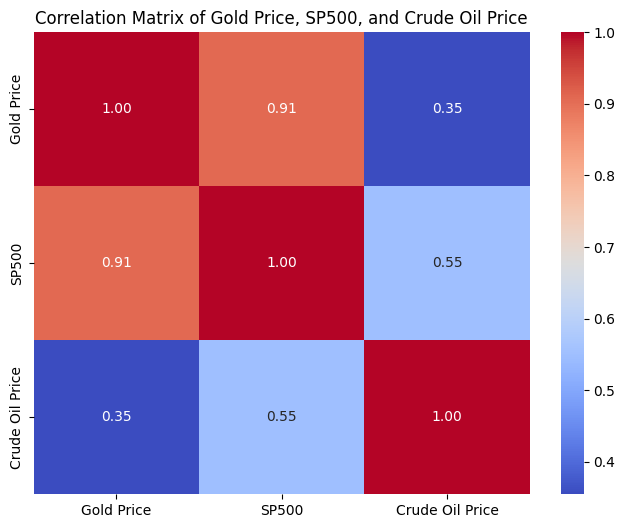

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title('Correlation Matrix of Gold Price, SP500, and Crude Oil Price')

# Display the heatmap
plt.show()

## Generate scatter plots with trendlines

### Subtask:
Create scatter plots for each pair of datasets (Gold vs. SP500, Gold vs. Crude Oil, SP500 vs. Crude Oil) using the merged DataFrame and add trendlines to each plot.


**Reasoning**:
Create and display scatter plots for each pair of datasets with trendlines.



In [139]:
# Create scatter plot for Gold Price vs. SP500 with trendline
fig_gold_sp500 = px.scatter(merged_df, x='Gold Price', y='SP500', trendline='ols', title='Gold Price vs. SP500 with Trendline')
fig_gold_sp500.show()

# Create scatter plot for Gold Price vs. Crude Oil Price with trendline
fig_gold_oil = px.scatter(merged_df, x='Gold Price', y='Crude Oil Price', trendline='ols', title='Gold Price vs. Crude Oil Price with Trendline')
fig_gold_oil.show()

# Create scatter plot for SP500 vs. Crude Oil Price with trendline
fig_sp500_oil = px.scatter(merged_df, x='SP500', y='Crude Oil Price', trendline='ols', title='SP500 vs. Crude Oil Price with Trendline')
fig_sp500_oil.show()

## Summary:

### Data Analysis Key Findings

*   The correlation matrix shows a strong positive correlation between Gold Price and SP500 (0.91).
*   A moderate positive correlation exists between SP500 and Crude Oil Price (0.55).
*   The correlation between Gold Price and Crude Oil Price is weaker but still positive (0.35).
*   Scatter plots with OLS trendlines visually confirm these relationships, showing an upward trend in each pairing as one variable increases, the other tends to increase as well.

### Insights or Next Steps

*   Investigate the time series properties of these assets to understand how the correlations might change over time.
*   Explore potential factors that could influence the observed correlations, such as economic indicators or geopolitical events.
